In [108]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#read in the data
df=pd.read_csv('movies[1].csv')


In [109]:
#let's look at the data 
print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [110]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [111]:
df.tail()

name rating   genre  year                          released  \
7663   More to Life    NaN   Drama  2020  October 23, 2020 (United States)   
7664    Dream Round    NaN  Comedy  2020  February 7, 2020 (United States)   
7665  Saving Mbango    NaN   Drama  2020         April 27, 2020 (Cameroon)   
7666   It's Just Us    NaN   Drama  2020   October 1, 2020 (United States)   
7667      Tee em el    NaN  Horror  2020   August 19, 2020 (United States)   

      score  votes       director         writer              star  \
7663    3.1   18.0  Joseph Ebanks  Joseph Ebanks      Shannon Bond   
7664    4.7   36.0   Dusty Dukatz    Lisa Huston  Michael Saquella   
7665    5.7   29.0   Nkanya Nkwai   Lynno Lovert      Onyama Laura   
7666    NaN    NaN  James Randall  James Randall     Christina Roz   
7667    5.7    7.0   Pereko Mosia   Pereko Mosia  Siyabonga Mabaso   

            country   budget  gross                    company  runtime  
7663  United States   7000.0    NaN                        NaN     90.0  
7664  United States      NaN    NaN  Cactus Blue Entertainment     90.0  
7665  United States  58750.0    NaN           Embi Productions      NaN  
7666  United States  15000.0    NaN                        NaN    120.0  
7667   South Africa      NaN    NaN                PK 65 Films    102.0

In [112]:
df=df.dropna()

In [113]:
print(df)

                                                   name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                          

In [114]:
df.tail()

name     rating      genre  year  \
7648     Bad Boys for Life          R     Action  2020   
7649    Sonic the Hedgehog         PG     Action  2020   
7650              Dolittle         PG  Adventure  2020   
7651  The Call of the Wild         PG  Adventure  2020   
7652     The Eight Hundred  Not Rated     Action  2020   

                               released  score     votes        director  \
7648   January 17, 2020 (United States)    6.6  140000.0    Adil El Arbi   
7649  February 14, 2020 (United States)    6.5  102000.0     Jeff Fowler   
7650   January 17, 2020 (United States)    5.6   53000.0  Stephen Gaghan   
7651  February 21, 2020 (United States)    6.8   42000.0   Chris Sanders   
7652    August 28, 2020 (United States)    6.8    3700.0         Hu Guan   

              writer               star        country       budget  \
7648     Peter Craig         Will Smith  United States   90000000.0   
7649       Pat Casey       Ben Schwartz  United States   85000000.0   
7650  Stephen Gaghan  Robert Downey Jr.  United States  175000000.0   
7651   Michael Green      Harrison Ford         Canada  135000000.0   
7652         Hu Guan    Zhi-zhong Huang          China   80000000.0   

            gross                              company  runtime  
7648  426505244.0                    Columbia Pictures    124.0  
7649  319715683.0                   Paramount Pictures     99.0  
7650  245487753.0                   Universal Pictures    101.0  
7651  111105497.0                 20th Century Studios    100.0  
7652  461421559.0  Beijing Diqi Yinxiang Entertainment    149.0

In [115]:
#lets see if there is any missing data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

name-0%
rating-0%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-0%
gross-0%
company-0%
runtime-0%


In [117]:
df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [153]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  \
5445  2847246203  Twentieth Century Fox    162.0   
7445  2797501328         Marvel Studios    181.0   
3045  2201647264  Twentieth Century Fox    194.0   
6663  2069521700              Lucasfilm    138.0   
7244  2048359754         Marvel Studios    149.0   

                                   Year  
5445  December 18, 2009 (United States)  
7445     April 26, 2019 (United States)  
3045  December 19, 1997 (United States)  
6663  December 18, 2015 (United States)  
7244     April 27, 2018 (United States)

In [119]:
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

In [120]:
pd.set_option('display.max_rows',None)

In [121]:
# drop any duplicates
df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
6311                                    Despicable Me 2         PG  Animation   
6

In [84]:
# budget gonna have high correlation gross revenue
#company having high correlation with the gross revenue

In [154]:
df['Year'] = df['released'].astype(str)
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  \
5445  2847246203  Twentieth Century Fox    162.0   
7445  2797501328         Marvel Studios    181.0   
3045  2201647264  Twentieth Century Fox    194.0   
6663  2069521700              Lucasfilm    138.0   
7244  2048359754         Marvel Studios    149.0   

                                   Year  
5445  December 18, 2009 (United States)  
7445     April 26, 2019 (United States)  
3045  December 19, 1997 (United States)  
6663  December 18, 2015 (United States)  
7244     April 27, 2018 (United States)

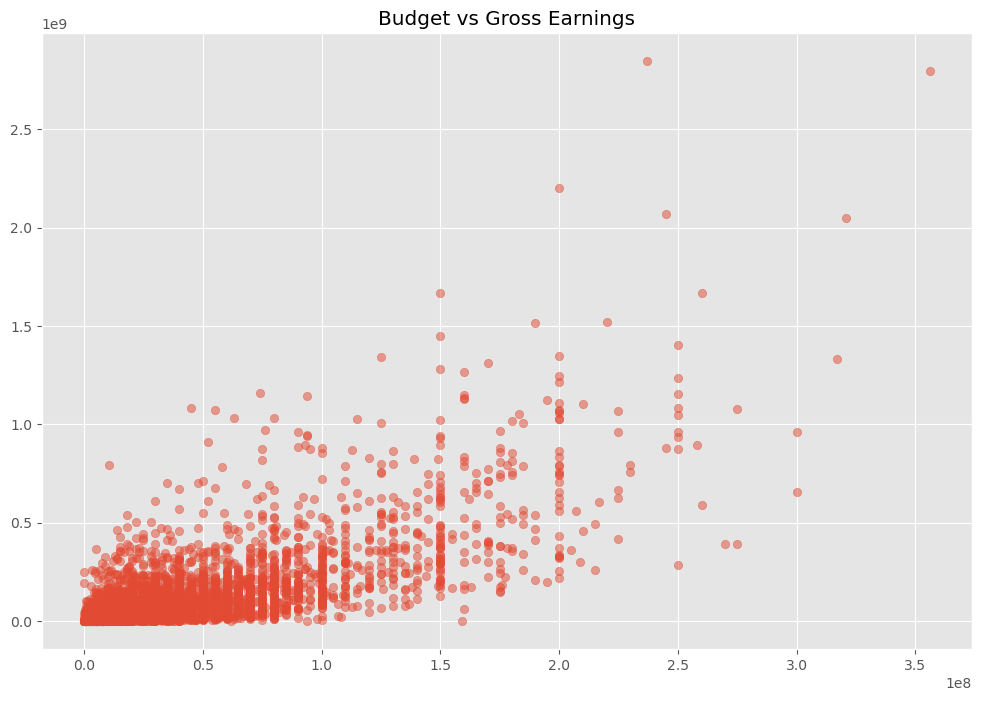

In [90]:
#scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'],y=df['gross'],alpha=0.5)

plt.title('Budget vs Gross Earnings')
plt.show()


In [57]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

<Axes: xlabel='budget', ylabel='gross'>

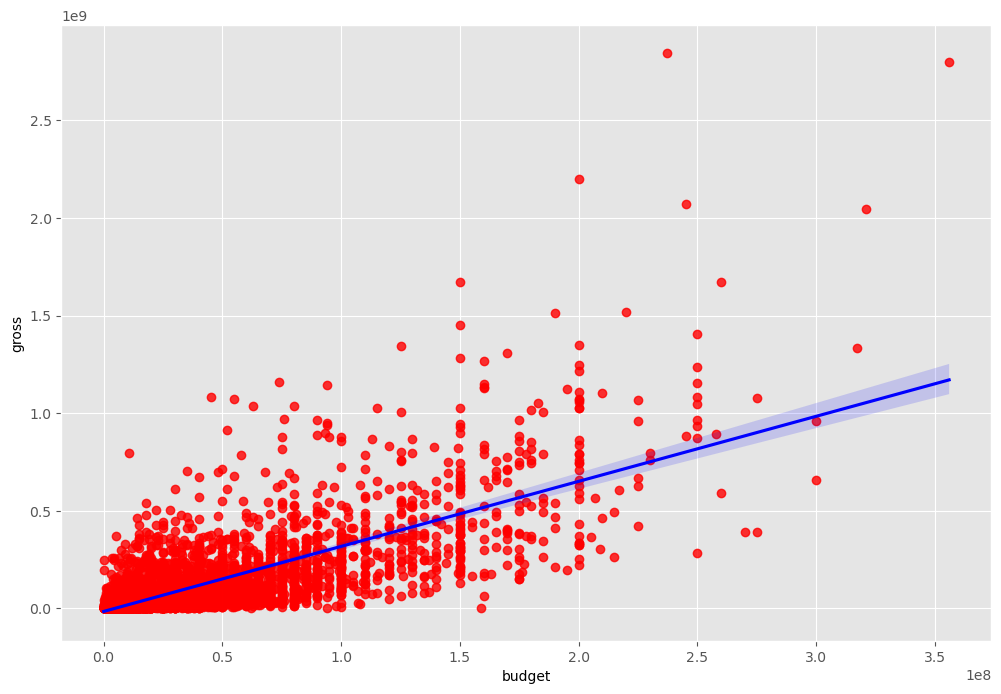

In [63]:
#plot budget vs gross using seaborn to know the coreelation b/w two

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [67]:
#lets start looking at correlation
df.corr(method='pearson')

C:\Users\ravin\AppData\Local\Temp\ipykernel_10196\2518493252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [68]:
#result = high correlation between budget vs gross

C:\Users\ravin\AppData\Local\Temp\ipykernel_10196\3182776263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr(method='pearson')


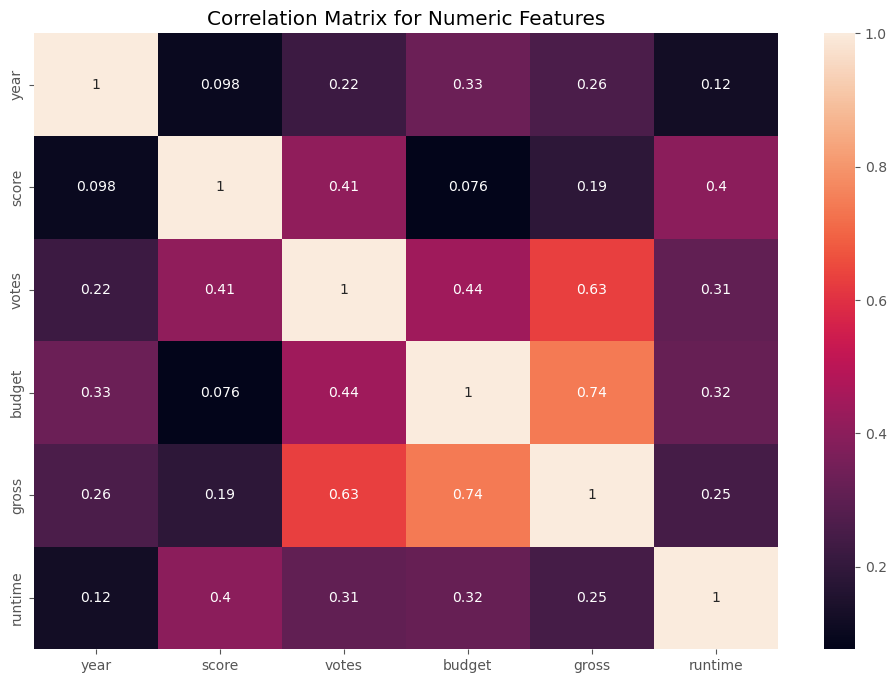

In [92]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [135]:
#looks at company



In [155]:
df_numerized= df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
                                  
df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  Year  
5445  1534       47  237000000  2847246203     1382    162.0   527  
7445  1470       47  356000000  2797501328      983    181.0   137  
3045  1073       47  200000000  2201647264     1382    194.0   534  
6663   356       47  245000000  2069521700      945    138.0   529  
7244  1470       47  321000000  2048359754      983    149.0   145

In [156]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000.0       785    1263   
7445   388       5      0  2019       137    8.4   903000.0       105     513   
3045  4909       5      6  1997       534    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       529    7.8   876000.0       768    1806   
7244   389       5      0  2018       145    8.4   897000.0       105     513   

      star  country     budget       gross  company  runtime  Year  
5445  1534       47  237000000  2847246203     1382    162.0   527  
7445  1470       47  356000000  2797501328      983    181.0   137  
3045  1073       47  200000000  2201647264     1382    194.0   534  
6663   356       47  245000000  2069521700      945    138.0   529  
7244  1470       47  321000000  2048359754      983    149.0   145

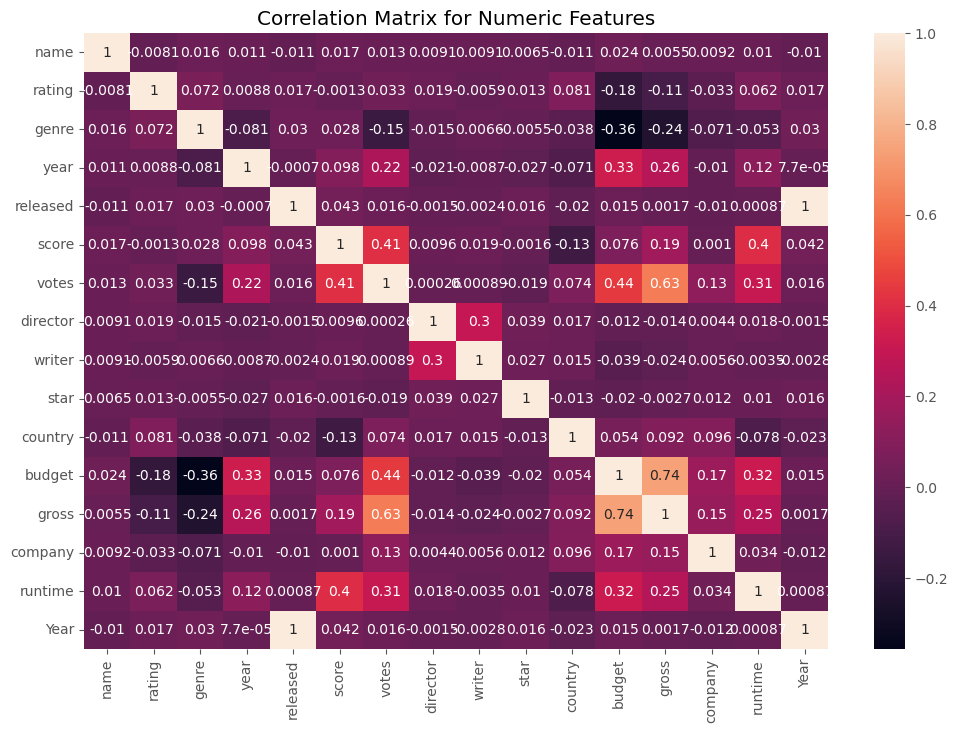

In [136]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [138]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating   -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre     0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year      0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score     0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes     0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director  0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer    0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star      0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country  -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget    0.023970 -0.176002 -0.356564  0.329321  0.014683  0.076254   
gross     0.005533 -0.107339 -0.235650  0.257486  0.001659  0.186258   
company   0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime   0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
Year     -0.010480  0.017208  0.030429  0.000077  0.998458  0.042148   

             votes  director    writer      star   country    budget  \
name      0.013088  0.009079  0.009081  0.006472 -0.010737  0.023970   
rating    0.033225  0.019483 -0.005921  0.013405  0.081244 -0.176002   
genre    -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.356564   
year      0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.329321   
released  0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.014683   
score     0.409182  0.009559  0.019416 -0.001609 -0.133348  0.076254   
votes     1.000000  0.000260  0.000892 -0.019282  0.073625  0.442429   
director  0.000260  1.000000  0.299067  0.039234  0.017490 -0.012272   
writer    0.000892  0.299067  1.000000  0.027245  0.015343 -0.039451   
star     -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019589   
country   0.073625  0.017490  0.015343 -0.012998  1.000000  0.054063   
budget    0.442429 -0.012272 -0.039451 -0.019589  0.054063  1.000000   
gross     0.630757 -0.014441 -0.023519 -0.002717  0.092129  0.740395   
company   0.133204  0.004404  0.005646  0.012442  0.095548  0.173214   
runtime   0.309212  0.017624 -0.003511  0.010174 -0.078412  0.320447   
Year      0.016154 -0.001526 -0.002784  0.015805 -0.023408  0.014683   

             gross   company   runtime      Year  
name      0.005533  0.009211  0.010392 -0.010480  
rating   -0.107339 -0.032943  0.062145  0.017208  
genre    -0.235650 -0.071067 -0.052711  0.030429  
year      0.257486 -0.010431  0.120811  0.000077  
released  0.001659 -0.010474  0.000868  0.998458  
score     0.186258  0.001030  0.399451  0.042148  
votes     0.630757  0.133204  0.309212  0.016154  
director -0.014441  0.004404  0.017624 -0.001526  
writer   -0.023519  0.005646 -0.003511 -0.002784  
star     -0.002717  0.012442  0.010174  0.015805  
country   0.092129  0.095548 -0.078412 -0.023408  
budget    0.740395  0.173214  0.320447  0.014683  
gross     1.000000  0.154840  0.245216  0.001659  
company   0.154840  1.000000  0.034402 -0.012269  
runtime   0.245216  0.034402  1.000000  0.000868  
Year      0.001659 -0.012269  0.000868  1.000000

In [143]:
correlation_mat = df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
          Year       -0.010480
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
          Year        0.017208
genre   

In [144]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.356564
budget    genre      -0.356564
genre     gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
genre     year       -0.081261
year      genre      -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
country   year       -0.070938
year      country    -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
budget    writer     -0.039451
writer    budget     -0.039451
country   genre      -0.037615
genre     country    -0.037615
rating    company    -0.032943
company   rating     -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
country 

In [152]:
high_correlation = sorted_pairs[(sorted_pairs)>0.5]
high_correlation

votes     gross       0.630757
gross     votes       0.630757
          budget      0.740395
budget    gross       0.740395
Year      released    0.998458
released  Year        0.998458
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
Year      Year        1.000000
dtype: float64

In [ ]:
#votes and budget has high correlation towards gross earnings
# budget and company has low correlation 